In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install spark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# create spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [ ]:
folder_path1 = '/content/drive/MyDrive/flight_covid19_project/Combined_Flights_2019.csv'
folder_path2 = '/content/drive/MyDrive/flight_covid19_project/Combined_Flights_2020.csv'
folder_path3 = '/content/drive/MyDrive/flight_covid19_project/Combined_Flights_2021.csv'
folder_path4 = '/content/drive/MyDrive/flight_covid19_project/Combined_Flights_2022.csv'

In [ ]:
df1 = spark.read.format('csv').option('header', 'true').load(folder_path1)
df2 = spark.read.format('csv').option('header', 'true').load(folder_path2)
df3 = spark.read.format('csv').option('header', 'true').load(folder_path3)
df4 = spark.read.format('csv').option('header', 'true').load(folder_path4)

In [ ]:
df2.show()

+----------+-----------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+----------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|    Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinute

In [ ]:
df3.show()

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+--------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|D

In [ ]:
flight_df1 = df1.select('FlightDate','Airline','Origin','Dest','Cancelled','OriginStateName','DestStateName')\
                        .sort('FlightDate')
flight_df2 = df2.select('FlightDate','Airline','Origin','Dest','Cancelled','OriginStateName','DestStateName')\
                        .sort('FlightDate')
flight_df3 = df3.select('FlightDate','Airline','Origin','Dest','Cancelled','OriginStateName','DestStateName')\
                        .sort('FlightDate')
flight_df4 = df4.select('FlightDate','Airline','Origin','Dest','Cancelled','OriginStateName','DestStateName')\
                        .sort('FlightDate')

In [ ]:
flight_df1.printSchema()
flight_df2.printSchema()
flight_df3.printSchema()
flight_df4.printSchema()

root
 |-- FlightDate: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestStateName: string (nullable = true)

root
 |-- FlightDate: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestStateName: string (nullable = true)

root
 |-- FlightDate: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestStateName: string (nullable = true)

root
 |-- FlightDate: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = 

In [ ]:
from pyspark.sql.functions import to_timestamp
# convert the FlightDate column to a timestamp column
flight_df1 = flight_df1.withColumn('FlightDate', to_timestamp(flight_df1['FlightDate'], 'yyyy-MM-dd'))
flight_df2 = flight_df2.withColumn('FlightDate', to_timestamp(flight_df2['FlightDate'], 'yyyy-MM-dd'))
flight_df3 = flight_df3.withColumn('FlightDate', to_timestamp(flight_df3['FlightDate'], 'yyyy-MM-dd'))
flight_df4 = flight_df4.withColumn('FlightDate', to_timestamp(flight_df4['FlightDate'], 'yyyy-MM-dd'))

# display the schema to confirm the column data type
flight_df3.printSchema()

root
 |-- FlightDate: timestamp (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestStateName: string (nullable = true)



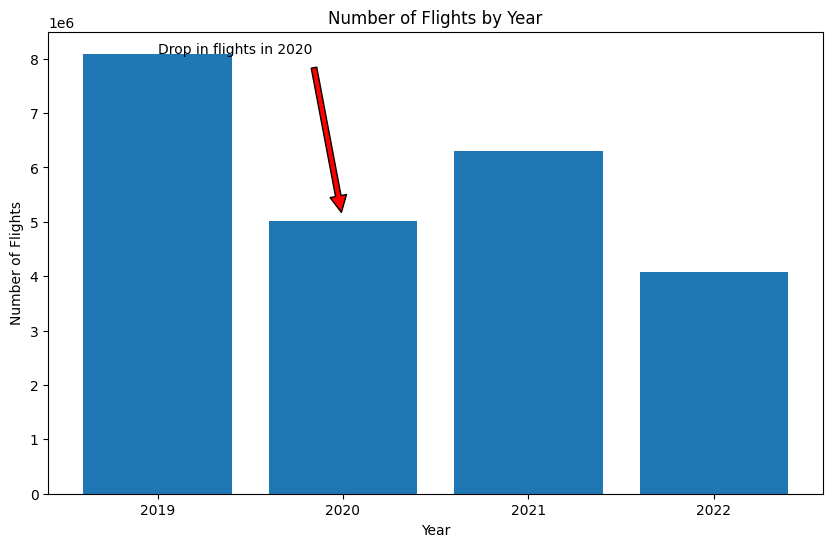

In [ ]:
# import PySpark modules
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, year
import matplotlib.pyplot as plt
import itertools

# create a DataFrame for each year with a column for the year and the count of flights
flights_2019 = flight_df1.groupBy(year('FlightDate')).agg(count('*').alias('num_flights')).orderBy(year('FlightDate'))
flights_2020 = flight_df2.groupBy(year('FlightDate')).agg(count('*').alias('num_flights')).orderBy(year('FlightDate'))
flights_2021 = flight_df3.groupBy(year('FlightDate')).agg(count('*').alias('num_flights')).orderBy(year('FlightDate'))
flights_2022 = flight_df4.groupBy(year('FlightDate')).agg(count('*').alias('num_flights')).orderBy(year('FlightDate'))

# create a list of years and the corresponding DataFrames
years = ['2019', '2020', '2021', '2022']
flight_dfs = [flights_2019, flights_2020, flights_2021, flights_2022]

# extract the number of flights for each year into a flattened list
num_flights = list(itertools.chain.from_iterable([df.select('num_flights').rdd.flatMap(lambda x: x).collect() for df in flight_dfs]))

# plot the data as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(years, num_flights)

# set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Flights')
ax.set_title('Number of Flights by Year')

# annotate the chart to highlight the drop in flights in 2020
ax.annotate('Drop in flights in 2020', xy=('2020', num_flights[1]), xytext=('2019', num_flights[0]),
            arrowprops=dict(facecolor='red', shrink=0.05))

# display the chart
plt.show()


In [ ]:
from pyspark.sql.functions import col

# filter the airlines that operated in 2019 and create a list of unique airline names
airlines_2019 = flight_df1.select(col('Airline')).distinct().rdd.map(lambda x: x[0]).collect()


In [ ]:
# filter the airlines that operated in 2020 and create a list of unique airline names
airlines_2020 = flight_df2.select(col('airline')).distinct().rdd.map(lambda x: x[0]).collect()

# filter the airlines that operated in 2021 and create a list of unique airline names
airlines_2021 = flight_df3.select(col('airline')).distinct().rdd.map(lambda x: x[0]).collect()

In [ ]:
print(sorted(airlines_2019))
print(sorted(airlines_2020))
print(sorted(airlines_2021))

['Air Wisconsin Airlines Corp', 'Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.', 'Capital Cargo International', 'Comair Inc.', 'Commutair Aka Champlain Enterprises, Inc.', 'Compass Airlines', 'Delta Air Lines Inc.', 'Empire Airlines Inc.', 'Endeavor Air Inc.', 'Envoy Air', 'ExpressJet Airlines Inc.', 'Frontier Airlines Inc.', 'GoJet Airlines, LLC d/b/a United Express', 'Hawaiian Airlines Inc.', 'Horizon Air', 'JetBlue Airways', 'Mesa Airlines Inc.', 'Peninsula Airways Inc.', 'Republic Airlines', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines', 'Trans States Airlines', 'United Air Lines Inc.']
['Air Wisconsin Airlines Corp', 'Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.', 'Capital Cargo International', 'Comair Inc.', 'Commutair Aka Champlain Enterprises, Inc.', 'Compass Airlines', 'Delta Air Lines Inc.', 'Empire Airlines Inc.', 'Endeavor Air Inc.', 'Envoy Air', 'ExpressJet Airlines Inc.', 'Frontier Airlines Inc.', 'GoJet Airline

In [ ]:
# load the CSV file into a DataFrame
covid_df = spark.read.csv('/content/drive/MyDrive/flight_covid19_project/us-states.csv', header=True, inferSchema=True)

# display the schema
covid_df.printSchema()

root
 |-- date: date (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)



In [ ]:
from pyspark.sql.functions import year

# Add a new column with the year extracted from the 'date' column
covid_df_with_year = covid_df.withColumn("year", year("date"))

# Partition the DataFrame by year
covid_2019 = covid_df_with_year.filter(covid_df_with_year.year == 2019)
covid_2020 = covid_df_with_year.filter(covid_df_with_year.year == 2020)
covid_2021 = covid_df_with_year.filter(covid_df_with_year.year == 2021)
covid_2022 = covid_df_with_year.filter(covid_df_with_year.year == 2022)

covid_2020.show()

+----------+----------+----+-----+------+----+
|      date|     state|fips|cases|deaths|year|
+----------+----------+----+-----+------+----+
|2020-01-21|Washington|  53|    1|     0|2020|
|2020-01-22|Washington|  53|    1|     0|2020|
|2020-01-23|Washington|  53|    1|     0|2020|
|2020-01-24|  Illinois|  17|    1|     0|2020|
|2020-01-24|Washington|  53|    1|     0|2020|
|2020-01-25|California|   6|    1|     0|2020|
|2020-01-25|  Illinois|  17|    1|     0|2020|
|2020-01-25|Washington|  53|    1|     0|2020|
|2020-01-26|   Arizona|   4|    1|     0|2020|
|2020-01-26|California|   6|    2|     0|2020|
|2020-01-26|  Illinois|  17|    1|     0|2020|
|2020-01-26|Washington|  53|    1|     0|2020|
|2020-01-27|   Arizona|   4|    1|     0|2020|
|2020-01-27|California|   6|    2|     0|2020|
|2020-01-27|  Illinois|  17|    1|     0|2020|
|2020-01-27|Washington|  53|    1|     0|2020|
|2020-01-28|   Arizona|   4|    1|     0|2020|
|2020-01-28|California|   6|    2|     0|2020|
|2020-01-28| 

In [ ]:
from pyspark.sql.functions import max

# Group the data by state and get the latest number of cases for each state
latest_cases_2019 = covid_2019.groupBy("state").agg(max("date").alias("latest_date"), max("cases").alias("latest_cases"))
latest_cases_2020 = covid_2020.groupBy("state").agg(max("date").alias("latest_date"), max("cases").alias("latest_cases"))
latest_cases_2021 = covid_2021.groupBy("state").agg(max("date").alias("latest_date"), max("cases").alias("latest_cases"))
latest_cases_2022 = covid_2022.groupBy("state").agg(max("date").alias("latest_date"), max("cases").alias("latest_cases"))

# Show the latest number of cases for each state
latest_cases_2022.show()

+--------------------+-----------+------------+
|               state|latest_date|latest_cases|
+--------------------+-----------+------------+
|                Utah| 2022-12-31|     1075137|
|              Hawaii| 2022-12-31|      363188|
|           Minnesota| 2022-12-31|     1736893|
|                Ohio| 2022-12-31|     3307568|
|Northern Mariana ...| 2022-12-31|       13236|
|            Arkansas| 2022-12-31|      985493|
|              Oregon| 2022-12-31|      939303|
|               Texas| 2022-12-31|     8111323|
|        North Dakota| 2022-12-31|      280583|
|        Pennsylvania| 2022-12-31|     3416142|
|         Connecticut| 2022-12-31|      948001|
|            Nebraska| 2022-12-31|      556647|
|             Vermont| 2022-12-31|      148393|
|      American Samoa| 2022-12-31|        8266|
|              Nevada| 2022-12-31|      876118|
|         Puerto Rico| 2022-12-31|     1087420|
|          Washington| 2022-12-31|     1883676|
|            Illinois| 2022-12-31|     3

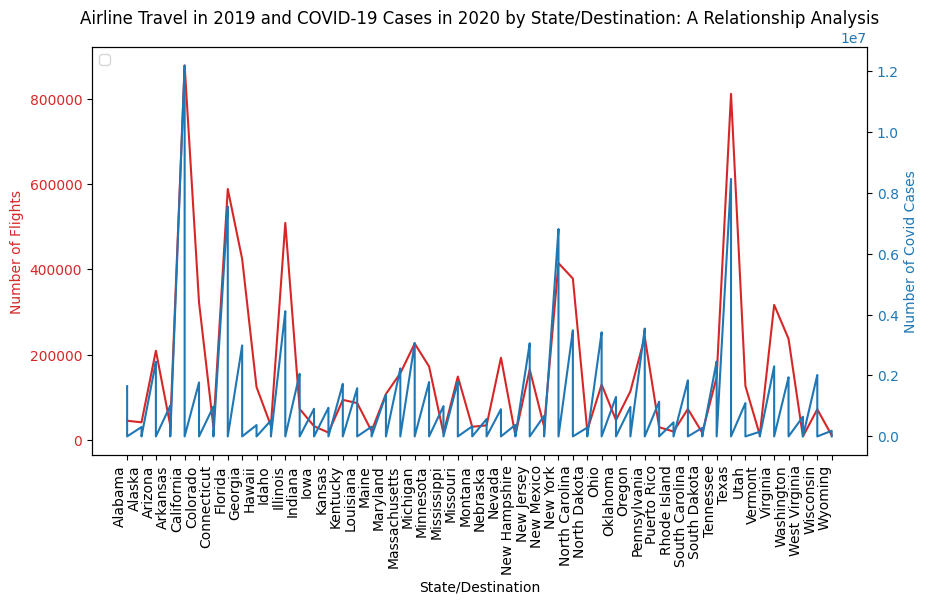

In [ ]:
# count the number of flights per destination state
flights_count = flight_df1.groupBy('DestStateName').count().withColumnRenamed('count', 'num_flights')

# join the covid and flight dataframes on the state/destination columns
joined_df = covid_df.join(flights_count, covid_df.state == flights_count.DestStateName)

# select the state/destination, the number of flights, and the number of COVID-19 cases
data = joined_df.select('state', 'num_flights', 'cases').orderBy('state').collect()

# create a list of states/destinations and the corresponding number of flights and COVID-19 cases
states = [row['state'] for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['cases'] for row in data]

# plot the data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.plot(states, num_flights, color=color)
ax.set_xlabel('State/Destination')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title("Airline Travel in 2019 and COVID-19 Cases in 2020 by State/Destination: A Relationship Analysis")

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(states, num_cases, color=color)
ax2.set_ylabel('Number of Covid Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# add a legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# rotate the x-axis labels for better readability
fig.autofmt_xdate(rotation=90)

# display the chart
plt.show()


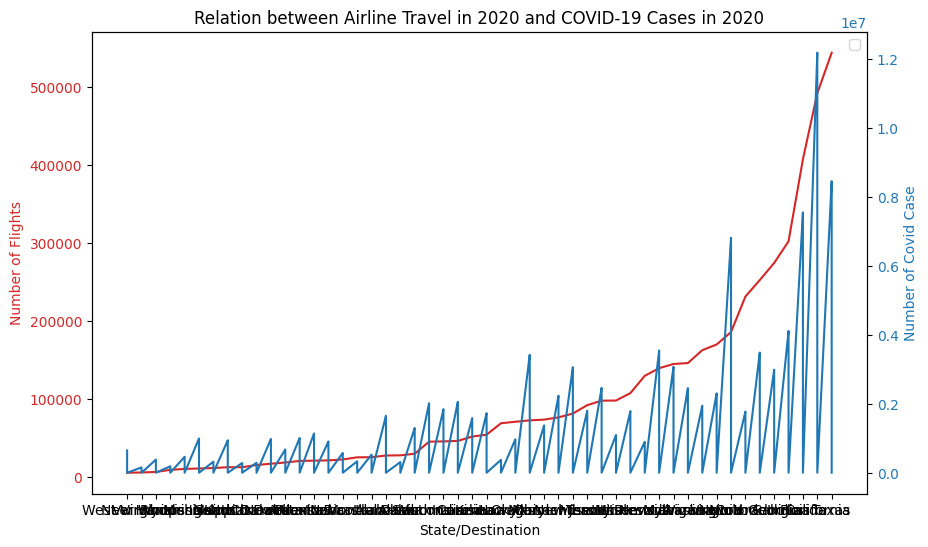

In [ ]:
# select the destination state and the number of flights for each state
num_flights_df = flight_df2.groupBy('DestStateName').count().withColumnRenamed('count', 'num_flights')

# select the state and the number of COVID-19 cases for each state
num_cases_df = covid_df.select('state', 'cases')

# join the two DataFrames on the state/destination columns
joined_df = num_cases_df.join(num_flights_df, num_cases_df.state == num_flights_df.DestStateName)

# select the state/destination, the number of flights, and the number of COVID-19 cases
data = joined_df.select('state', 'num_flights', 'cases').orderBy('num_flights').collect()

# create a list of states/destinations and the corresponding number of flights and COVID-19 cases
states = [row['state'] for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['cases'] for row in data]

# plot the data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.plot(states, num_flights, color=color)
ax.set_xlabel('State/Destination')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Relation between Airline Travel in 2020 and COVID-19 Cases in 2020')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(states, num_cases, color=color)
ax2.set_ylabel('Number of Covid Case', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# add a legend to the chart
ax.legend()

# display the chart
plt.show()


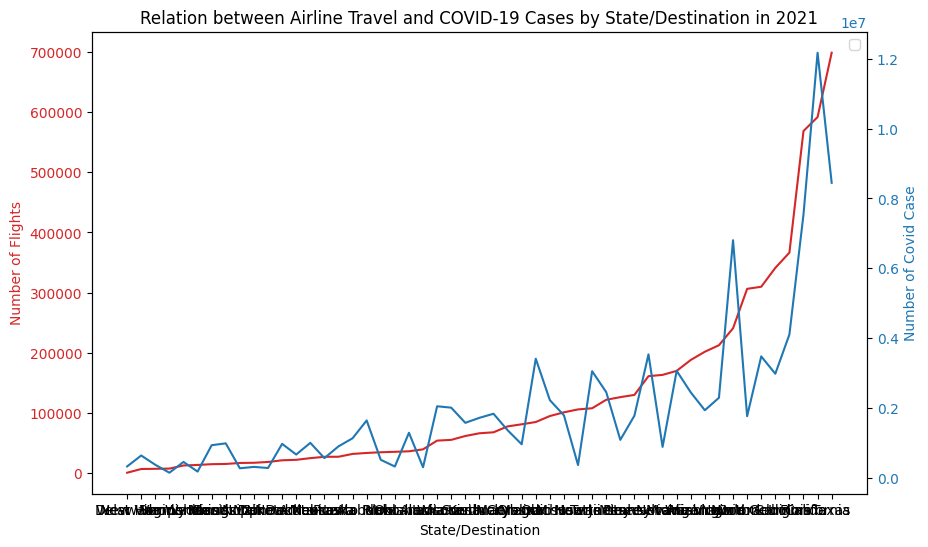

In [ ]:
# group the DataFrame by state and calculate the maximum number of cases for each state
cases_df = covid_df.groupBy('state').max('cases').withColumnRenamed('max(cases)', 'cases')

# load the 2021 flights dataset into a DataFrame
flights_2021 = flight_df3.groupBy('DestStateName').count().withColumnRenamed('count', 'num_flights')

# join the two DataFrames on the state/destination columns
joined_df = cases_df.join(flights_2021, cases_df.state == flights_2021.DestStateName)

# select the state/destination, the number of flights, and the number of COVID-19 cases
data = joined_df.select('state', 'num_flights', 'cases').orderBy('num_flights').collect()

# create a list of states/destinations and the corresponding number of flights and COVID-19 cases
states = [row['state'] for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['cases'] for row in data]

# plot the data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.plot(states, num_flights, color=color)
ax.set_xlabel('State/Destination')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Relation between Airline Travel and COVID-19 Cases by State/Destination in 2021')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(states, num_cases, color=color)
ax2.set_ylabel('Number of Covid Case', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# add a legend to the chart
ax.legend()

# display the chart
plt.show()


In [ ]:
import numpy as np
from matplotlib import ticker

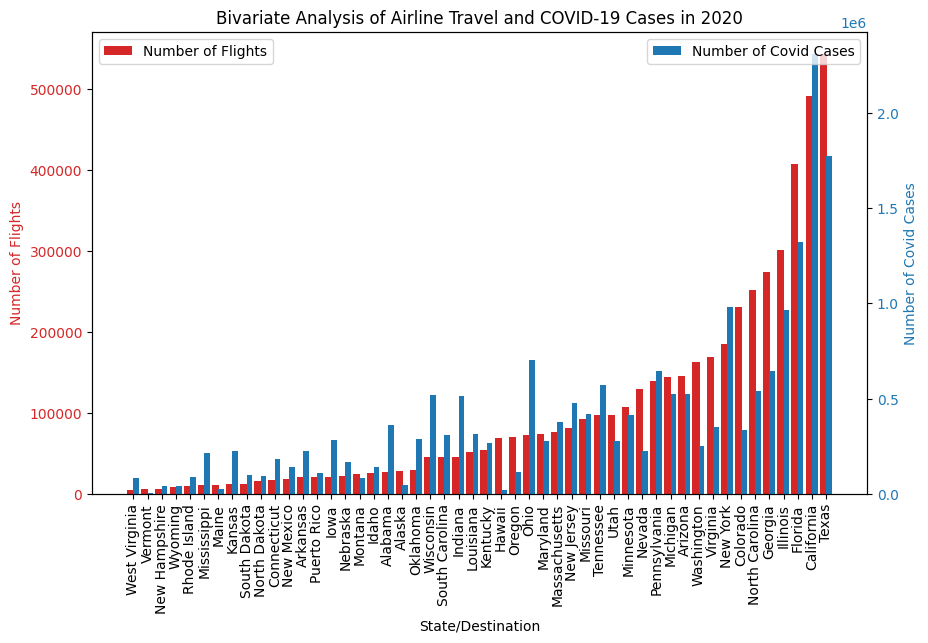

In [ ]:
# select the destination state and the number of flights for each state
num_flights_df = flight_df2.groupBy('DestStateName').count().withColumnRenamed('count', 'num_flights')

# select the state and the number of COVID-19 cases for each state
num_cases_df = latest_cases_2020.select('state', 'latest_cases')

# join the two DataFrames on the state/destination columns
joined_df = num_cases_df.join(num_flights_df, num_cases_df.state == num_flights_df.DestStateName)

# select the state/destination, the number of flights, and the number of COVID-19 cases
data = joined_df.select('state', 'num_flights', 'latest_cases').orderBy('num_flights').collect()

# create a list of states/destinations and the corresponding number of flights and COVID-19 cases
states = [row['state'] for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['latest_cases'] for row in data]

# Position of bars on x-axis
ind = np.arange(len(states))

# Width of a bar 
width = 0.4

# plot the data as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.bar(ind, num_flights, color=color, alpha=1, width=0.5, label='Number of Flights')
ax.set_xlabel('State/Destination')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Bivariate Analysis of Airline Travel and COVID-19 Cases in 2020')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.bar(ind+width, num_cases, color=color, alpha=1, width=0.4, label='Number of Covid Cases')
ax2.set_ylabel('Number of Covid Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# format the y-axis ticks to display actual numbers
formatter = ticker.ScalarFormatter(useOffset=False, useMathText=False)
ax.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# set the x-ticks to be the state names
ax.set_xticks(ind + width / 2, states)
ax.set_xticklabels(states, rotation=90)

# add a legend to the chart
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

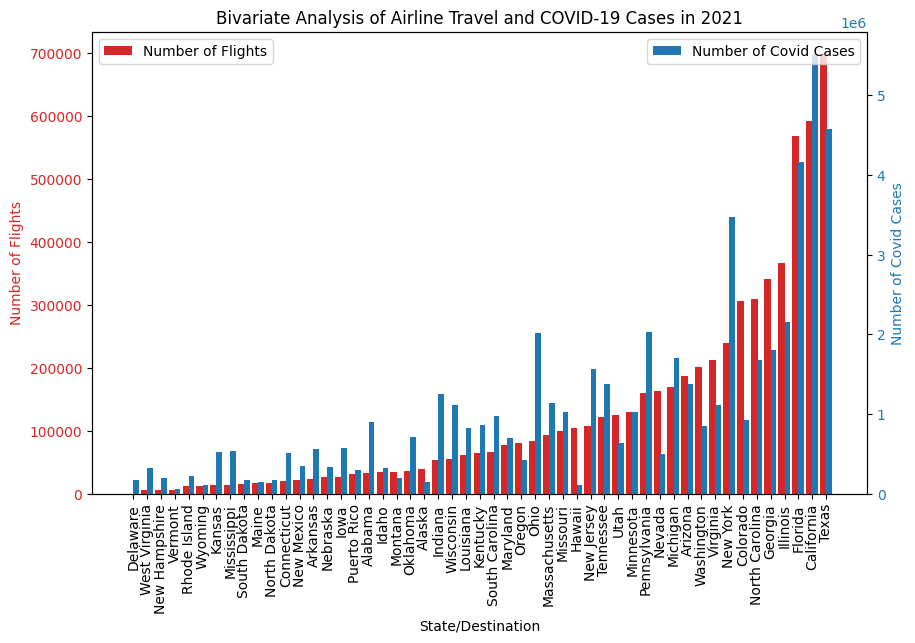

In [ ]:
# select the destination state and the number of flights for each state
num_flights_df = flight_df3.groupBy('DestStateName').count().withColumnRenamed('count', 'num_flights')

# select the state and the number of COVID-19 cases for each state
num_cases_df = latest_cases_2021.select('state', 'latest_cases')

# join the two DataFrames on the state/destination columns
joined_df = num_cases_df.join(num_flights_df, num_cases_df.state == num_flights_df.DestStateName)

# select the state/destination, the number of flights, and the number of COVID-19 cases
data = joined_df.select('state', 'num_flights', 'latest_cases').orderBy('num_flights').collect()

# create a list of states/destinations and the corresponding number of flights and COVID-19 cases
states = [row['state'] for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['latest_cases'] for row in data]

# Position of bars on x-axis
ind = np.arange(len(states))

# Width of a bar 
width = 0.4

# plot the data as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.bar(ind, num_flights, color=color, alpha=1, width=0.5, label='Number of Flights')
ax.set_xlabel('State/Destination')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Bivariate Analysis of Airline Travel and COVID-19 Cases in 2021')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.bar(ind+width, num_cases, color=color, alpha=1, width=0.4, label='Number of Covid Cases')
ax2.set_ylabel('Number of Covid Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# format the y-axis ticks to display actual numbers
formatter = ticker.ScalarFormatter(useOffset=False, useMathText=False)
ax.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# set the x-ticks to be the state names
ax.set_xticks(ind + width / 2, states)
ax.set_xticklabels(states, rotation=90)

# add a legend to the chart
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

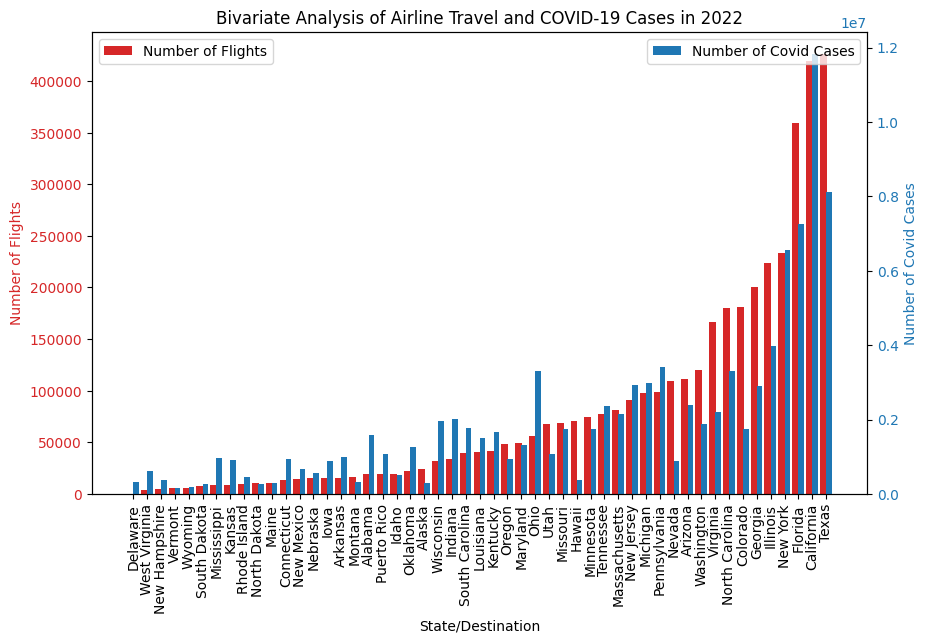

In [ ]:
# select the destination state and the number of flights for each state
num_flights_df = flight_df4.groupBy('DestStateName').count().withColumnRenamed('count', 'num_flights')

# select the state and the number of COVID-19 cases for each state
num_cases_df = latest_cases_2022.select('state', 'latest_cases')

# join the two DataFrames on the state/destination columns
joined_df = num_cases_df.join(num_flights_df, num_cases_df.state == num_flights_df.DestStateName)

# select the state/destination, the number of flights, and the number of COVID-19 cases
data = joined_df.select('state', 'num_flights', 'latest_cases').orderBy('num_flights').collect()

# create a list of states/destinations and the corresponding number of flights and COVID-19 cases
states = [row['state'] for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['latest_cases'] for row in data]

# Position of bars on x-axis
ind = np.arange(len(states))

# Width of a bar 
width = 0.4

# plot the data as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.bar(ind, num_flights, color=color, alpha=1, width=0.5, label='Number of Flights')
ax.set_xlabel('State/Destination')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Bivariate Analysis of Airline Travel and COVID-19 Cases in 2022')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.bar(ind+width, num_cases, color=color, alpha=1, width=0.4, label='Number of Covid Cases')
ax2.set_ylabel('Number of Covid Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# format the y-axis ticks to display actual numbers
formatter = ticker.ScalarFormatter(useOffset=False, useMathText=False)
ax.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# set the x-ticks to be the state names
ax.set_xticks(ind + width / 2, states)
ax.set_xticklabels(states, rotation=90)

# add a legend to the chart
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
from pyspark.sql.functions import month
# Add a new column with the year extracted from the 'date' column
df_with_year_month = covid_df.withColumn("year", year("date")).withColumn("month", month("date"))

df_with_year_month.show()

+----------+----------+----+-----+------+----+-----+
|      date|     state|fips|cases|deaths|year|month|
+----------+----------+----+-----+------+----+-----+
|2020-01-21|Washington|  53|    1|     0|2020|    1|
|2020-01-22|Washington|  53|    1|     0|2020|    1|
|2020-01-23|Washington|  53|    1|     0|2020|    1|
|2020-01-24|  Illinois|  17|    1|     0|2020|    1|
|2020-01-24|Washington|  53|    1|     0|2020|    1|
|2020-01-25|California|   6|    1|     0|2020|    1|
|2020-01-25|  Illinois|  17|    1|     0|2020|    1|
|2020-01-25|Washington|  53|    1|     0|2020|    1|
|2020-01-26|   Arizona|   4|    1|     0|2020|    1|
|2020-01-26|California|   6|    2|     0|2020|    1|
|2020-01-26|  Illinois|  17|    1|     0|2020|    1|
|2020-01-26|Washington|  53|    1|     0|2020|    1|
|2020-01-27|   Arizona|   4|    1|     0|2020|    1|
|2020-01-27|California|   6|    2|     0|2020|    1|
|2020-01-27|  Illinois|  17|    1|     0|2020|    1|
|2020-01-27|Washington|  53|    1|     0|2020|

In [ ]:
latest_cases = df_with_year_month.groupBy("year", "month", "state").agg(max("date").alias("latest_date"), max("cases").alias("latest_cases"))
latest_cases.show()

+----+-----+--------------------+-----------+------------+
|year|month|               state|latest_date|latest_cases|
+----+-----+--------------------+-----------+------------+
|2020|    6|Northern Mariana ...| 2020-06-30|          30|
|2020|    7|            Arkansas| 2020-07-31|       42511|
|2020|   11|           Louisiana| 2020-11-30|      232414|
|2021|    3|              Nevada| 2021-03-31|      303799|
|2021|    7|District of Columbia| 2021-07-31|       50398|
|2021|    7|            Nebraska| 2021-07-31|      228450|
|2021|    9|District of Columbia| 2021-09-30|       61153|
|2021|   10|         Mississippi| 2021-10-31|      504318|
|2021|   12|        South Dakota| 2021-12-31|      179204|
|2022|    2|            Arkansas| 2022-02-28|      819984|
|2022|    9|               Texas| 2022-09-30|     7882610|
|2023|    1|             Georgia| 2023-01-31|     2940401|
|2020|   10|            Missouri| 2020-10-31|      189925|
|2021|    3|       New Hampshire| 2021-03-31|       8417

In [ ]:
flight_df1_with_month = flight_df1.withColumn("year", year("FlightDate")).withColumn("month", month("FlightDate"))
flight_df2_with_month = flight_df2.withColumn("year", year("FlightDate")).withColumn("month", month("FlightDate"))
flight_df3_with_month = flight_df3.withColumn("year", year("FlightDate")).withColumn("month", month("FlightDate"))
flight_df4_with_month = flight_df4.withColumn("year", year("FlightDate")).withColumn("month", month("FlightDate"))

flight_df1_with_month.show()

+-------------------+--------------------+------+----+---------+---------------+-------------+----+-----+
|         FlightDate|             Airline|Origin|Dest|Cancelled|OriginStateName|DestStateName|year|month|
+-------------------+--------------------+------+----+---------+---------------+-------------+----+-----+
|2019-01-01 00:00:00|SkyWest Airlines ...|   DFW| LAW|    False|          Texas|     Oklahoma|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   LAW| DFW|    False|       Oklahoma|        Texas|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   EWR| ORD|    False|     New Jersey|     Illinois|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   ORD| EWR|    False|       Illinois|   New Jersey|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   TUS| LAX|    False|        Arizona|   California|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   BTR| DFW|    False|      Louisiana|        Texas|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   D

In [ ]:
# Stack the four DataFrames vertically using the union() method
combined_df = flight_df1_with_month.union(flight_df2_with_month).union(flight_df3_with_month).union(flight_df4_with_month)

# Show the resulting DataFrame
combined_df.show()

+-------------------+--------------------+------+----+---------+---------------+-------------+----+-----+
|         FlightDate|             Airline|Origin|Dest|Cancelled|OriginStateName|DestStateName|year|month|
+-------------------+--------------------+------+----+---------+---------------+-------------+----+-----+
|2019-01-01 00:00:00|SkyWest Airlines ...|   DFW| LAW|    False|          Texas|     Oklahoma|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   LAW| DFW|    False|       Oklahoma|        Texas|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   EWR| ORD|    False|     New Jersey|     Illinois|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   ORD| EWR|    False|       Illinois|   New Jersey|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   TUS| LAX|    False|        Arizona|   California|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   BTR| DFW|    False|      Louisiana|        Texas|2019|    1|
|2019-01-01 00:00:00|SkyWest Airlines ...|   D

In [ ]:
combined_df_monthly_state = combined_df.groupBy('year', 'month', 'DestStateName').agg(count('*').alias('num_flights')).orderBy('year', 'month', 'DestStateName')

combined_df_monthly_state.show()

+----+-----+-------------+-----------+
|year|month|DestStateName|num_flights|
+----+-----+-------------+-----------+
|2019|    1|      Alabama|       3547|
|2019|    1|       Alaska|       3141|
|2019|    1|      Arizona|      17562|
|2019|    1|     Arkansas|       2561|
|2019|    1|   California|      70596|
|2019|    1|     Colorado|      25235|
|2019|    1|  Connecticut|       2504|
|2019|    1|      Florida|      50466|
|2019|    1|      Georgia|      33226|
|2019|    1|       Hawaii|       9579|
|2019|    1|        Idaho|       2741|
|2019|    1|     Illinois|      39264|
|2019|    1|      Indiana|       5735|
|2019|    1|         Iowa|       2510|
|2019|    1|       Kansas|       1402|
|2019|    1|     Kentucky|       7122|
|2019|    1|    Louisiana|       6810|
|2019|    1|        Maine|       1392|
|2019|    1|     Maryland|       8010|
|2019|    1|Massachusetts|      11816|
+----+-----+-------------+-----------+
only showing top 20 rows



In [ ]:
combined_df_monthly_state_Texas = combined_df_monthly_state.filter(combined_df_monthly_state['DestStateName'] == 'Texas')

combined_df_monthly_state_Texas.show()

combined_df_monthly_state_California = combined_df_monthly_state.filter(combined_df_monthly_state['DestStateName'] == 'California')

combined_df_monthly_state_California.show()

combined_df_monthly_state_Florida = combined_df_monthly_state.filter(combined_df_monthly_state['DestStateName'] == 'Florida')

combined_df_monthly_state_Florida.show()

+----+-----+-------------+-----------+
|year|month|DestStateName|num_flights|
+----+-----+-------------+-----------+
|2019|    1|        Texas|      63690|
|2019|    2|        Texas|      58315|
|2019|    3|        Texas|      68058|
|2019|    4|        Texas|      65882|
|2019|    5|        Texas|      70497|
|2019|    6|        Texas|      69659|
|2019|    7|        Texas|      71398|
|2019|    8|        Texas|      71356|
|2019|    9|        Texas|      67756|
|2019|   10|        Texas|      70128|
|2019|   11|        Texas|      66394|
|2019|   12|        Texas|      68090|
|2020|    1|        Texas|      65745|
|2020|    2|        Texas|      61901|
|2020|    3|        Texas|      69187|
|2020|    4|        Texas|      39182|
|2020|    5|        Texas|      24276|
|2020|    6|        Texas|      27354|
|2020|    7|        Texas|      41125|
|2020|    8|        Texas|      44610|
+----+-----+-------------+-----------+
only showing top 20 rows

+----+-----+-------------+-----------+

In [ ]:
combined_df_monthly = combined_df.groupBy('year', 'month').agg(count('*').alias('num_flights')).orderBy('year', 'month')

combined_df_monthly.show()

+----+-----+-----------+
|year|month|num_flights|
+----+-----+-----------+
|2019|    1|     638649|
|2019|    2|     582966|
|2019|    3|     689221|
|2019|    4|     668259|
|2019|    5|     694311|
|2019|    6|     694469|
|2019|    7|     717684|
|2019|    8|     717456|
|2019|    9|     660712|
|2019|   10|     692944|
|2019|   11|     655072|
|2019|   12|     679941|
|2020|    1|     660556|
|2020|    2|     623103|
|2020|    3|     701274|
|2020|    4|     331238|
|2020|    5|     192412|
|2020|    6|     237264|
|2020|    7|     370859|
|2020|    8|     398470|
+----+-----+-----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import year, month, max, sum

import pandas as pd

covid_df_with_month = covid_df.withColumn("year", year("date")).withColumn("month", month("date"))

covid_df_with_month.printSchema()

covid_df_monthly_state = covid_df_with_month.groupBy('year', 'month', 'state').agg(max('cases').alias('latest_cases_month')).orderBy('year', 'month')

covid_df_monthly_state.printSchema()

covid_df_monthly_state.show()

covid_df_monthly_country = covid_df_monthly_state.groupBy('year', 'month').agg(sum('latest_cases_month').alias('total_cases_month')).orderBy('year', 'month')

covid_df_monthly_country.show()

root
 |-- date: date (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- latest_cases_month: integer (nullable = true)

+----+-----+-------------+------------------+
|year|month|        state|latest_cases_month|
+----+-----+-------------+------------------+
|2020|    1|     Illinois|                 2|
|2020|    1|   California|                 3|
|2020|    1|      Arizona|                 1|
|2020|    1|   Washington|                 1|
|2020|    2|      Arizona|                 1|
|2020|    2|   Washington|                10|
|2020|    2|       Oregon|                 1|
|2020|    2|     Illinois|                 3|
|2020|    2|         Utah|                 1|
|2020|    2| 

In [ ]:
covid_df_monthly_Texas = covid_df_monthly_state.filter(covid_df_monthly_state['state'] == 'Texas')

covid_df_monthly_Texas.show()

covid_df_monthly_California = covid_df_monthly_state.filter(covid_df_monthly_state['state'] == 'California')

covid_df_monthly_California.show()

covid_df_monthly_Florida = covid_df_monthly_state.filter(covid_df_monthly_state['state'] == 'Florida')

covid_df_monthly_Florida.show()

+----+-----+-----+------------------+
|year|month|state|latest_cases_month|
+----+-----+-----+------------------+
|2020|    2|Texas|                11|
|2020|    3|Texas|              3588|
|2020|    4|Texas|             29072|
|2020|    5|Texas|             64974|
|2020|    6|Texas|            166703|
|2020|    7|Texas|            443090|
|2020|    8|Texas|            640317|
|2020|    9|Texas|            784027|
|2020|   10|Texas|            953451|
|2020|   11|Texas|           1261943|
|2020|   12|Texas|           1770527|
|2021|    1|Texas|           2372960|
|2021|    2|Texas|           2650283|
|2021|    3|Texas|           2790030|
|2021|    4|Texas|           2889252|
|2021|    5|Texas|           2947933|
|2021|    6|Texas|           2993964|
|2021|    7|Texas|           3132348|
|2021|    8|Texas|           3604438|
|2021|    9|Texas|           4059956|
+----+-----+-----+------------------+
only showing top 20 rows

+----+-----+----------+------------------+
|year|month|     st

In [ ]:
cases_df = covid_df_monthly_country

flights = combined_df_monthly

joined_df = cases_df.join(flights, (cases_df.year == flights.year) & (cases_df.month == flights.month))

joined_df = joined_df.drop(flights.year).drop(flights.month)

joined_df.show()

+----+-----+-----------------+-----------+
|year|month|total_cases_month|num_flights|
+----+-----+-----------------+-----------+
|2020|    6|          2653321|     237264|
|2020|   11|         13615321|     389587|
|2020|    3|           188461|     701274|
|2020|    9|          7262735|     345294|
|2020|   12|         20024801|     397802|
|2020|    4|          1075758|     331238|
|2020|    1|                7|     660556|
|2020|    8|          6045457|     398470|
|2020|    7|          4571669|     370859|
|2020|    2|               70|     623103|
|2020|   10|          9209007|     374538|
|2020|    5|          1799302|     192412|
|2021|    8|         39316629|     611494|
|2021|    6|         33641758|     573779|
|2021|    5|         33281783|     520059|
|2021|   10|         45934098|     595373|
|2021|   11|         48520792|     576693|
|2021|    9|         43458032|     567916|
|2021|   12|         54689367|     580238|
|2021|    7|         35018565|     615703|
+----+-----

In [ ]:
cases_df_Texas = covid_df_monthly_Texas

flights_Texas = combined_df_monthly_state_Texas

joined_df_Texas = cases_df_Texas.join(flights_Texas, (cases_df_Texas.year == flights_Texas.year) & (cases_df_Texas.month == flights_Texas.month))

joined_df_Texas = joined_df_Texas.drop(flights_Texas.year).drop(flights_Texas.month)

joined_df_Texas.show()

cases_df_California = covid_df_monthly_California

flights_California = combined_df_monthly_state_California

joined_df_California = cases_df_California.join(flights_California, (cases_df_California.year == flights_California.year) & (cases_df_California.month == flights_California.month))

joined_df_California = joined_df_California.drop(flights_California.year).drop(flights_California.month)

joined_df_California.show()

cases_df_Florida = covid_df_monthly_Florida

flights_Florida = combined_df_monthly_state_Florida

joined_df_Florida = cases_df_Florida.join(flights_Florida, (cases_df_Florida.year == flights_Florida.year) & (cases_df_Florida.month == flights_Florida.month))

joined_df_Florida = joined_df_Florida.drop(flights_Florida.year).drop(flights_Florida.month)

joined_df_Florida.show()

+----+-----+-----+------------------+-------------+-----------+
|year|month|state|latest_cases_month|DestStateName|num_flights|
+----+-----+-----+------------------+-------------+-----------+
|2020|   12|Texas|           1770527|        Texas|      44501|
|2020|    3|Texas|              3588|        Texas|      69187|
|2020|   11|Texas|           1261943|        Texas|      43602|
|2020|    7|Texas|            443090|        Texas|      41125|
|2020|    4|Texas|             29072|        Texas|      39182|
|2020|    2|Texas|                11|        Texas|      61901|
|2020|   10|Texas|            953451|        Texas|      42178|
|2020|    5|Texas|             64974|        Texas|      24276|
|2020|    6|Texas|            166703|        Texas|      27354|
|2020|    8|Texas|            640317|        Texas|      44610|
|2020|    9|Texas|            784027|        Texas|      39654|
|2021|    4|Texas|           2889252|        Texas|      52835|
|2021|    5|Texas|           2947933|   

In [ ]:
joined_df.printSchema()

joined_df_Texas.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- total_cases_month: long (nullable = true)
 |-- num_flights: long (nullable = false)

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- latest_cases_month: integer (nullable = true)
 |-- DestStateName: string (nullable = true)
 |-- num_flights: long (nullable = false)



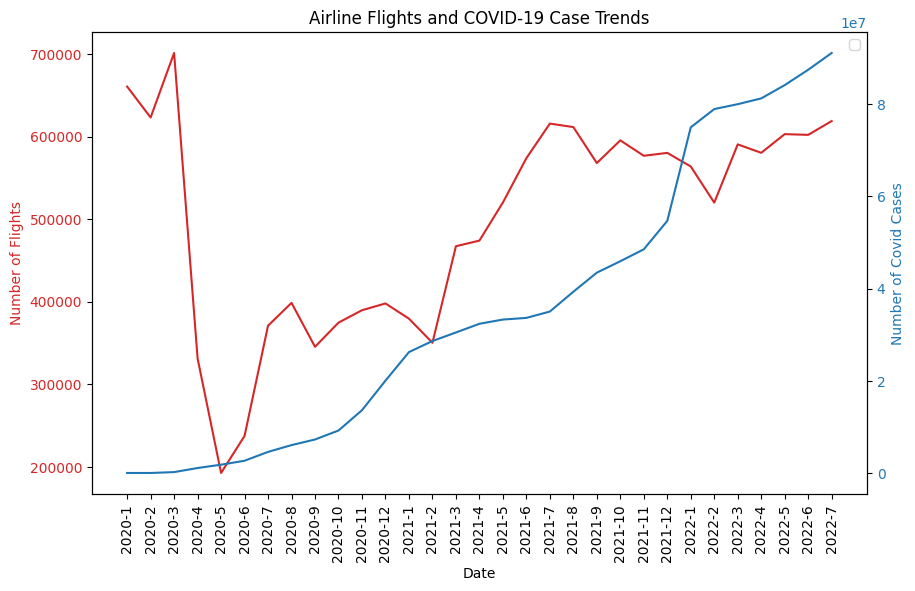

In [ ]:
data = joined_df.select('year', 'month','total_cases_month', 'num_flights').orderBy('year', 'month').collect()

time = [f"{row['year']}-{row['month']}" for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['total_cases_month'] for row in data]

# plot the data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.plot(time, num_flights, color=color)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Airline Flights and COVID-19 Case Trends')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(time, num_cases, color=color)
ax2.set_ylabel('Number of Covid Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# set the x-ticks to be the state names
ax.set_xticks(time)
ax.set_xticklabels(time, rotation=90)

# add a legend to the chart
ax.legend()

# display the chart
plt.show()


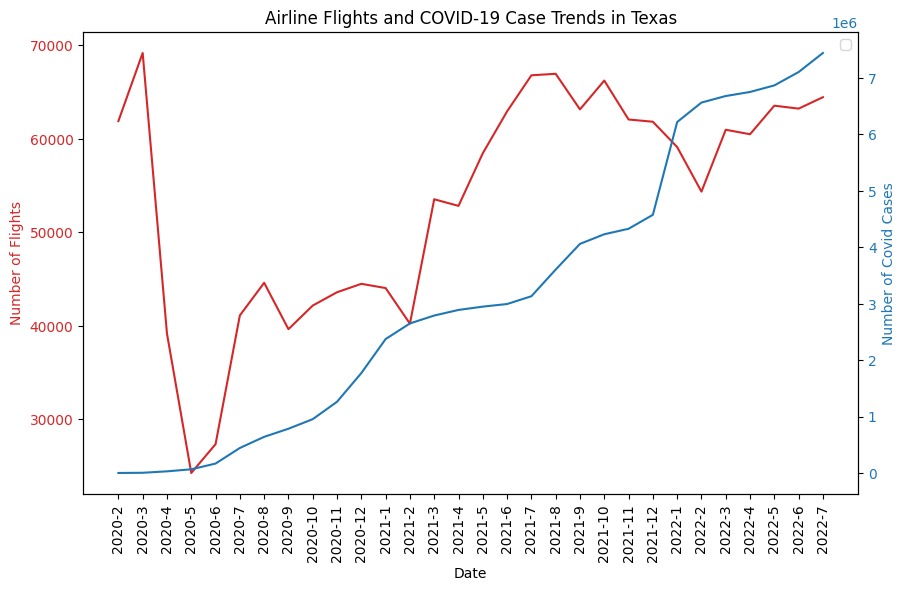

In [ ]:
data = joined_df_Texas.select('year', 'month','latest_cases_month', 'num_flights').orderBy('year', 'month').collect()

time = [f"{row['year']}-{row['month']}" for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['latest_cases_month'] for row in data]

# plot the data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.plot(time, num_flights, color=color)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Airline Flights and COVID-19 Case Trends in Texas')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(time, num_cases, color=color)
ax2.set_ylabel('Number of Covid Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# set the x-ticks to be the state names
ax.set_xticks(time)
ax.set_xticklabels(time, rotation=90)

# add a legend to the chart
ax.legend()

# display the chart
plt.show()


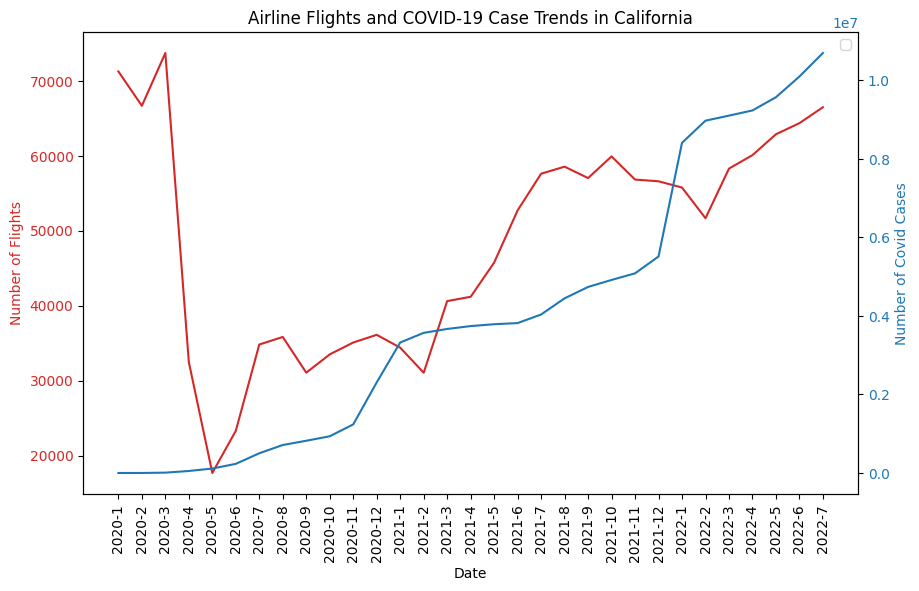

In [ ]:
data = joined_df_California.select('year', 'month','latest_cases_month', 'num_flights').orderBy('year', 'month').collect()

time = [f"{row['year']}-{row['month']}" for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['latest_cases_month'] for row in data]

# plot the data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.plot(time, num_flights, color=color)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Airline Flights and COVID-19 Case Trends in California')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(time, num_cases, color=color)
ax2.set_ylabel('Number of Covid Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# set the x-ticks to be the state names
ax.set_xticks(time)
ax.set_xticklabels(time, rotation=90)

# add a legend to the chart
ax.legend()

# display the chart
plt.show()


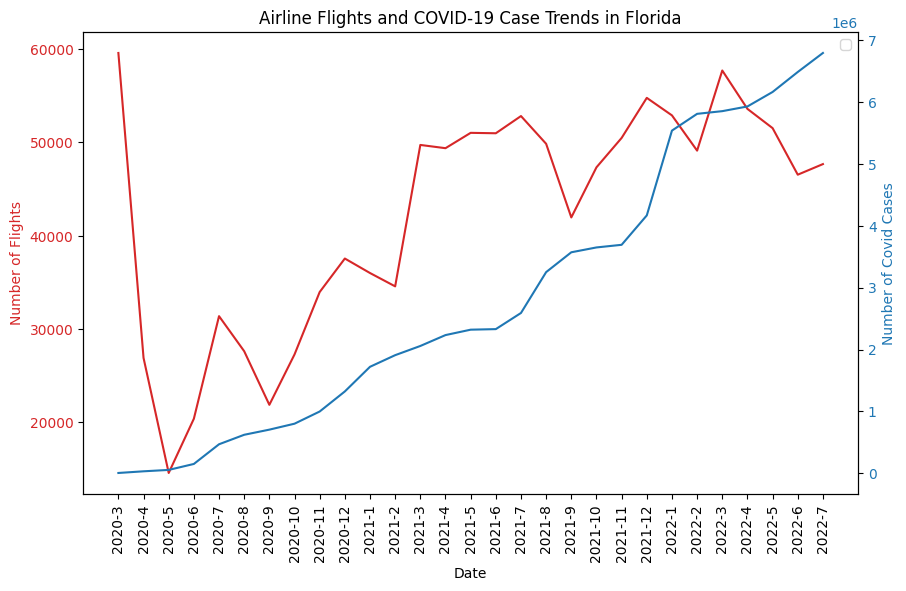

In [ ]:
data = joined_df_Florida.select('year', 'month','latest_cases_month', 'num_flights').orderBy('year', 'month').collect()

time = [f"{row['year']}-{row['month']}" for row in data]
num_flights = [row['num_flights'] for row in data]
num_cases = [row['latest_cases_month'] for row in data]

# plot the data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.plot(time, num_flights, color=color)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Airline Flights and COVID-19 Case Trends in Florida')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(time, num_cases, color=color)
ax2.set_ylabel('Number of Covid Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# set the x-ticks to be the state names
ax.set_xticks(time)
ax.set_xticklabels(time, rotation=90)

# add a legend to the chart
ax.legend()

# display the chart
plt.show()


In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType

# Read COVID-19 cases data
covid_cases_df = covid_df

# Combine the flight data from all the files
flights_2019_df = flight_df1

# Filter COVID-19 cases for the year 2020
covid_cases_df = covid_cases_df.withColumn('date', F.to_date('date', 'yyyy-MM-dd'))
covid_cases_2020_df = covid_cases_df.filter(F.year('date') == 2020)

# Aggregate the number of flights per state in 2019
flights_2019_agg = flights_2019_df.groupBy('OriginStateName').count().withColumnRenamed('count', 'num_flights')

# Aggregate the number of COVID-19 cases per state in 2020
covid_cases_2020_agg = covid_cases_2020_df.groupBy('state').agg(F.sum('cases').alias('cases'))

# Join the two DataFrames on the 'state' column
joined_df = flights_2019_agg.join(covid_cases_2020_agg, flights_2019_agg.OriginStateName == covid_cases_2020_agg.state)

# Calculate the correlation coefficient
correlation = joined_df.stat.corr('num_flights', 'cases')
print(f"Correlation coefficient: {correlation:.2f}")


Correlation coefficient: 0.91


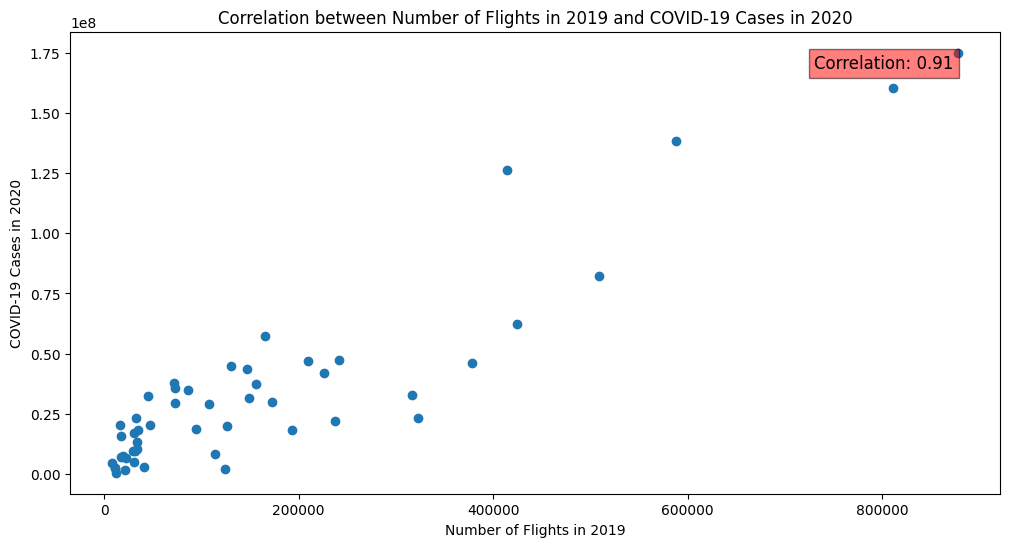

In [ ]:
# Convert the joined PySpark DataFrame to a Pandas DataFrame
joined_pd_df = joined_df.toPandas()

# Create a scatter plot with Matplotlib
plt.figure(figsize=(12, 6))
plt.scatter(joined_pd_df['num_flights'], joined_pd_df['cases'])
plt.xlabel('Number of Flights in 2019')
plt.ylabel('COVID-19 Cases in 2020')
plt.title('Correlation between Number of Flights in 2019 and COVID-19 Cases in 2020')

# Add correlation coefficient to the plot
plt.text(0.95, 0.95, f"Correlation: {correlation:.2f}",
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()


In [ ]:
# Combine the flight data from all the files
flights_2020_df = flight_df2

# Filter COVID-19 cases for the year 2020
covid_cases_df = covid_cases_df.withColumn('date', F.to_date('date', 'yyyy-MM-dd'))
covid_cases_2020_df = covid_cases_df.filter(F.year('date') == 2020)

# Aggregate the number of flights per state in 2020
flights_2020_agg = flights_2020_df.groupBy('OriginStateName').count().withColumnRenamed('count', 'num_flights')

# Aggregate the number of COVID-19 cases per state in 2020
covid_cases_2020_agg = covid_cases_2020_df.groupBy('state').agg(F.sum('cases').alias('cases'))

# Join the two DataFrames on the 'state' column
joined_df2 = flights_2020_agg.join(covid_cases_2020_agg, flights_2020_agg.OriginStateName == covid_cases_2020_agg.state)

# Calculate the correlation coefficient
correlation = joined_df2.stat.corr('num_flights', 'cases')
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.89


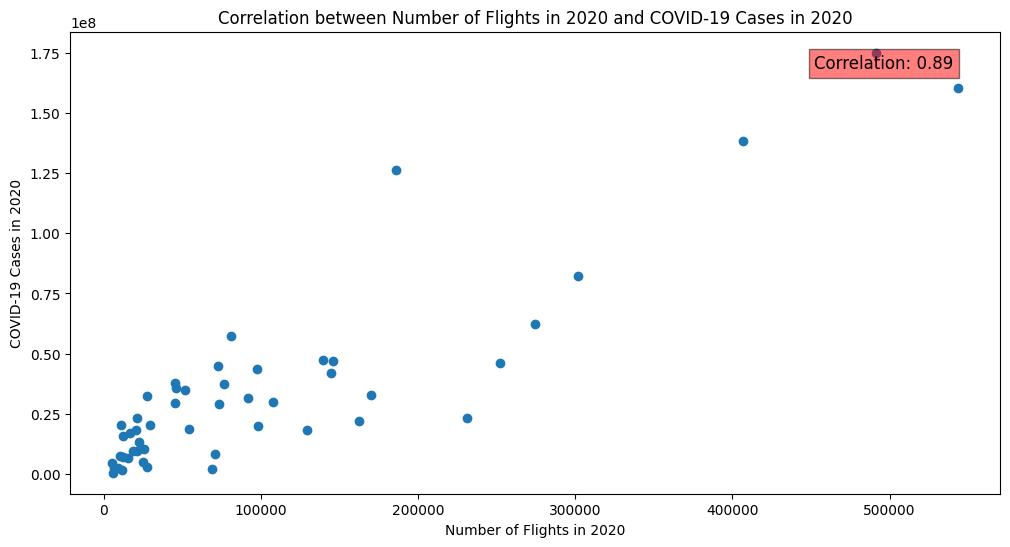

In [ ]:
# Convert the joined PySpark DataFrame to a Pandas DataFrame
joined_pd_df2 = joined_df2.toPandas()

# Create a scatter plot with Matplotlib
plt.figure(figsize=(12, 6))
plt.scatter(joined_pd_df2['num_flights'], joined_pd_df2['cases'])
plt.xlabel('Number of Flights in 2020')
plt.ylabel('COVID-19 Cases in 2020')
plt.title('Correlation between Number of Flights in 2020 and COVID-19 Cases in 2020')

# Add correlation coefficient to the plot
plt.text(0.95, 0.95, f"Correlation: {correlation:.2f}",
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()

In [ ]:
# Combine the flight data from all the files
flights_2021_df = flight_df3

# Filter COVID-19 cases for the year 2021
covid_cases_df = covid_cases_df.withColumn('date', F.to_date('date', 'yyyy-MM-dd'))
covid_cases_2021_df = covid_cases_df.filter(F.year('date') == 2021)

# Aggregate the number of flights per state in 2021
flights_2021_agg = flights_2021_df.groupBy('OriginStateName').count().withColumnRenamed('count', 'num_flights')

# Aggregate the number of COVID-19 cases per state in 2021
covid_cases_2021_agg = covid_cases_2021_df.groupBy('state').agg(F.sum('cases').alias('cases'))

# Join the two DataFrames on the 'state' column
joined_df3 = flights_2021_agg.join(covid_cases_2021_agg, flights_2021_agg.OriginStateName == covid_cases_2021_agg.state)

# Calculate the correlation coefficient
correlation = joined_df3.stat.corr('num_flights', 'cases')
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.89


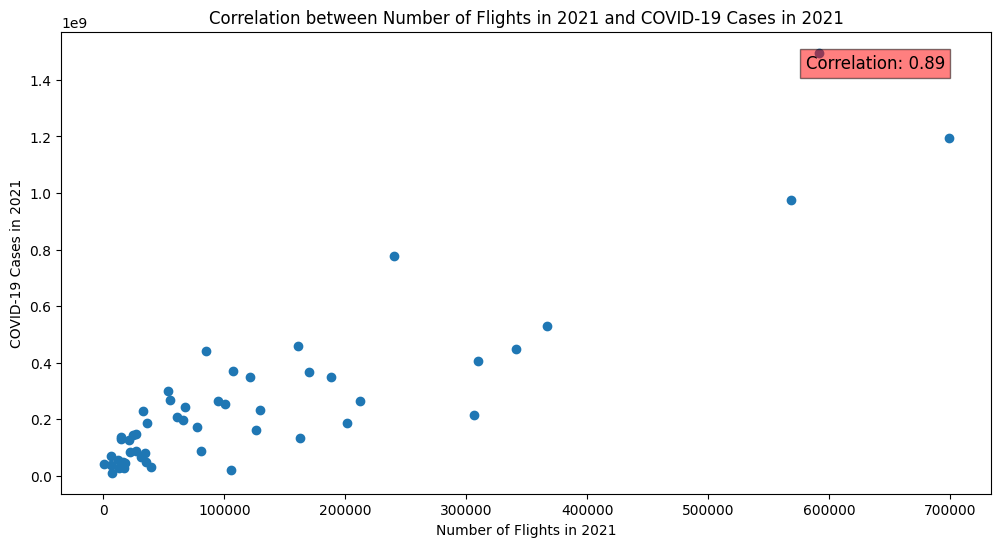

In [ ]:
# Convert the joined PySpark DataFrame to a Pandas DataFrame
joined_pd_df3 = joined_df3.toPandas()

# Create a scatter plot with Matplotlib
plt.figure(figsize=(12, 6))
plt.scatter(joined_pd_df3['num_flights'], joined_pd_df3['cases'])
plt.xlabel('Number of Flights in 2021')
plt.ylabel('COVID-19 Cases in 2021')
plt.title('Correlation between Number of Flights in 2021 and COVID-19 Cases in 2021')

# Add correlation coefficient to the plot
plt.text(0.95, 0.95, f"Correlation: {correlation:.2f}",
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()

In [ ]:
# Combine the flight data from all the files
flights_2022_df = flight_df4

# Filter COVID-19 cases for the year 2022
covid_cases_df = covid_cases_df.withColumn('date', F.to_date('date', 'yyyy-MM-dd'))
covid_cases_2022_df = covid_cases_df.filter(F.year('date') == 2022)

# Aggregate the number of flights per state in 2022
flights_2022_agg = flights_2022_df.groupBy('OriginStateName').count().withColumnRenamed('count', 'num_flights')

# Aggregate the number of COVID-19 cases per state in 2022
covid_cases_2022_agg = covid_cases_2022_df.groupBy('state').agg(F.sum('cases').alias('cases'))

# Join the two DataFrames on the 'state' column
joined_df4 = flights_2022_agg.join(covid_cases_2022_agg, flights_2022_agg.OriginStateName == covid_cases_2022_agg.state)

# Calculate the correlation coefficient
correlation = joined_df4.stat.corr('num_flights', 'cases')
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.92


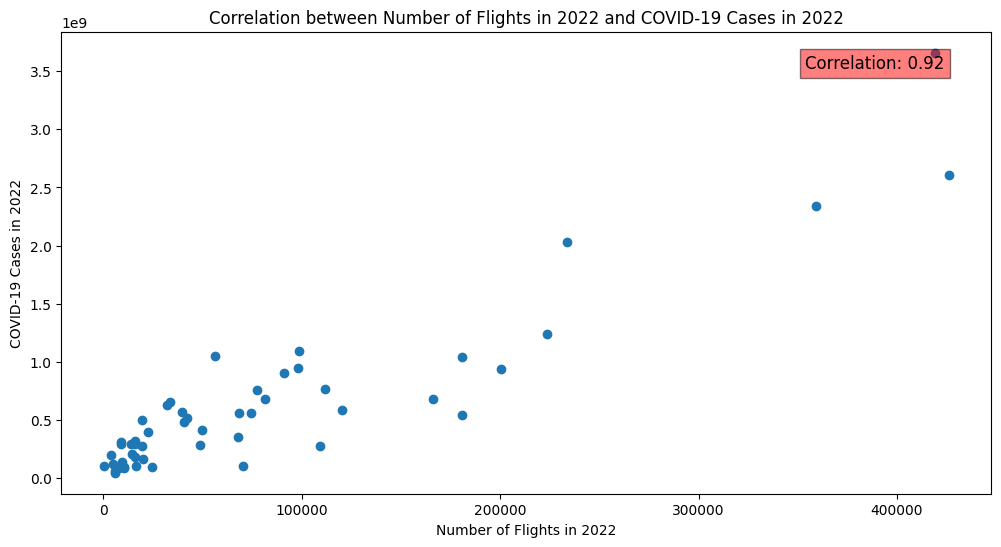

In [ ]:
# Convert the joined PySpark DataFrame to a Pandas DataFrame
joined_pd_df4 = joined_df4.toPandas()

# Create a scatter plot with Matplotlib
plt.figure(figsize=(12, 6))
plt.scatter(joined_pd_df4['num_flights'], joined_pd_df4['cases'])
plt.xlabel('Number of Flights in 2022')
plt.ylabel('COVID-19 Cases in 2022')
plt.title('Correlation between Number of Flights in 2022 and COVID-19 Cases in 2022')

# Add correlation coefficient to the plot
plt.text(0.95, 0.95, f"Correlation: {correlation:.2f}",
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()

In [ ]:
# Find flight count by date
combined_flight_df = flight_df1.union(flight_df2).union(flight_df3).union(flight_df4)
flight_count = combined_flight_df.groupBy('FlightDate').agg(count('*').alias('flight_count')).sort('FlightDate').toPandas()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


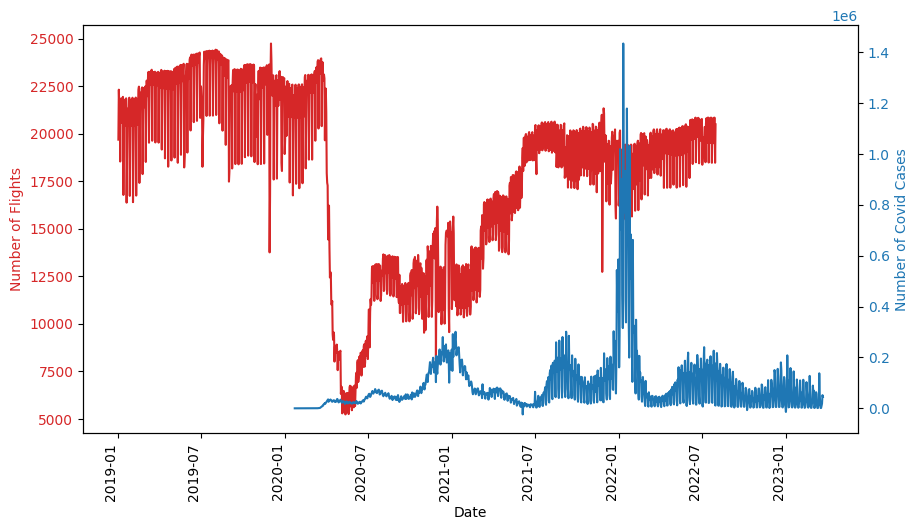

In [ ]:

# Find daily new cases
daily_cumulative = covid_df.groupby('date').agg(F.sum('cases').alias('total_cases')).sort('date').toPandas()
dates = daily_cumulative['date']
values = daily_cumulative['total_cases']
daily_cases = [values[i+1] - values[i] for i in range(len(values)-1)]
ddates = [dates[i+1] for i in range(len(values)-1)]

# plot the data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax.plot(flight_count['FlightDate'], flight_count['flight_count'], color=color)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Flights', color=color)
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx() # create a separate axis for Covid cases
color = 'tab:blue'
ax2.plot(ddates, daily_cases, color=color) # plot Covid cases on ax2
ax2.set_ylabel('Number of Covid Cases', color=color) # set y-axis label for Covid cases
ax2.tick_params(axis='y', labelcolor=color)

# format the y-axis ticks to display actual numbers
formatter = ticker.ScalarFormatter(useOffset=False, useMathText=False)
ax.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# rotate the x-axis labels for better readability
fig.autofmt_xdate(rotation=90)

# display the chart
plt.show()